#### Step 3: Feature Engineering

##### Technical Indicators

In [1]:
# Read processed excel
import pandas as pd
df = pd.read_csv(r"D:\DATA SCIENCE\SCHOOL PROJECTS\MACHINE LEARNING\data\processed\BTCUSDT_1d_processed.csv")




In [2]:
# Simple Moving Average (SMA) :Smooths price over time to spot trends- sum of the last 20,30,50 days of close divided by 20,30,50
df["sma_20"] = df["close"].rolling(20).mean()   # 20-day SMA
df["sma_50"] = df["close"].rolling(50).mean()   # 50-day SMA
df["sma_200"] = df["close"].rolling(200).mean() # 200-day SMA


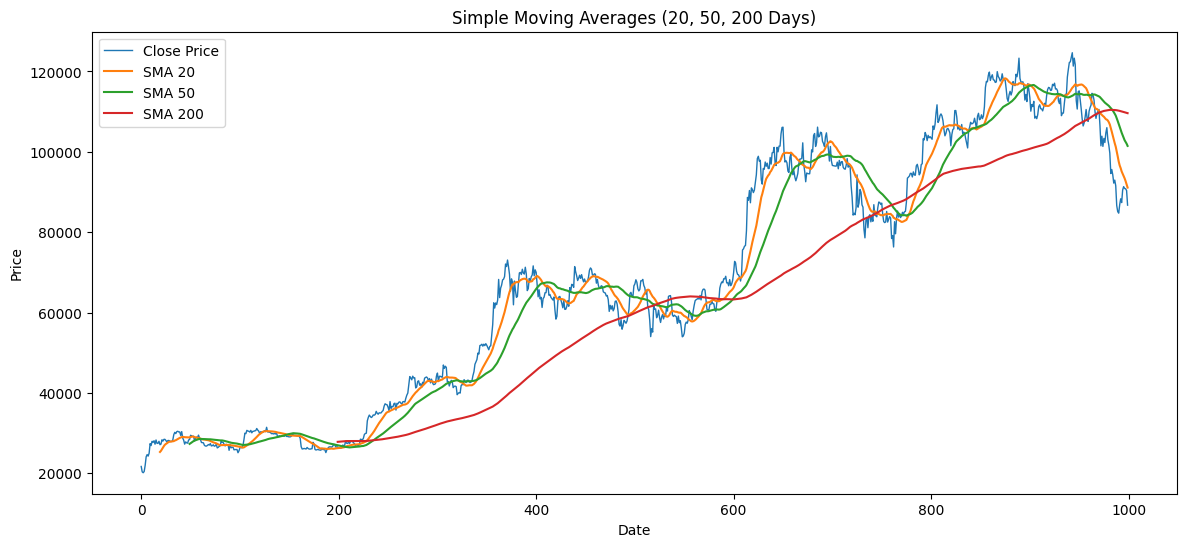

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Plot the close price
plt.plot(df.index, df["close"], label="Close Price", linewidth=1)

# Plot SMAs
plt.plot(df.index, df["sma_20"], label="SMA 20")
plt.plot(df.index, df["sma_50"], label="SMA 50")
plt.plot(df.index, df["sma_200"], label="SMA 200")

plt.title("Simple Moving Averages (20, 50, 200 Days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [4]:
# RSI (Relative Strength Index)- Shows overbought or oversold conditions,RSI ranges 0–100
# 70 → Overbought (possible Sell)
# <30 → Oversold (possible Buy)
import ta
df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()


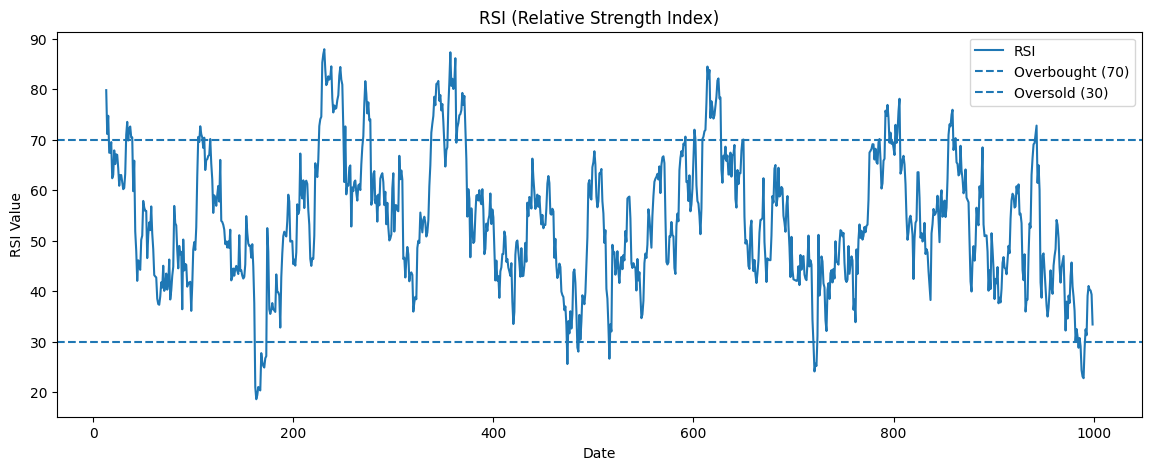

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.plot(df.index, df["rsi"], label="RSI")

# Add horizontal lines for thresholds
plt.axhline(70, linestyle="--", label="Overbought (70)")
plt.axhline(30, linestyle="--", label="Oversold (30)")

plt.title("RSI (Relative Strength Index)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()


In [6]:
# Moving Average Convergence Divergence (MACD) - Captures trend changes, helps identify potential ttrend reversals, momentum strength and overall direction of an asset's price.
# MACDLine=12−dayEMA−26−dayEMA
# SignalLine=9−dayEMA
# MACDHistogram=MACDLine−SignalLine
# MACD line minus signal line indicates bullish/bearish momentum.
macd_object = ta.trend.MACD(df["close"])
df["macd"] = macd_object.macd()
df["macd signal"] = macd_object.macd_signal()
df["macd diff"] = macd_object.macd_diff()
df.tail()


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,close_pct_7d,vol_7d,vol_30d,sma_20,sma_50,sma_200,rsi,macd,macd signal,macd diff
995,2025-11-27,90484.01,91950.00,90089.91,91333.95,16833.50932,2025-11-27 23:59:59.999,1.535778e+09,3920172,8898.35835,...,0.054211,0.019451,0.023626,93972.9680,103496.8834,109896.3411,41.059094,-4751.029661,-5087.136100,336.106439
996,2025-11-28,91333.94,93092.00,90180.63,90890.70,18830.86012,2025-11-28 23:59:59.999,1.721418e+09,4229754,8961.64712,...,0.067677,0.017196,0.023361,93401.8560,102881.4494,109836.8380,40.328783,-4380.543260,-4945.817532,565.274272
997,2025-11-29,90890.71,91165.65,90155.47,90802.44,7429.88291,2025-11-29 23:59:59.999,6.737257e+08,1677860,3359.04932,...,0.071545,0.016751,0.023310,92705.8300,102442.0082,109770.3316,40.175548,-4047.396099,-4766.133245,718.737146
998,2025-11-30,90802.44,92000.01,90336.90,90360.00,9687.74175,2025-11-30 23:59:59.999,8.840518e+08,2154030,5002.96698,...,0.040654,0.016162,0.023077,91923.2735,102036.3202,109704.5925,39.368009,-3775.553553,-4568.017307,792.463754
999,2025-12-01,90360.01,90417.00,85604.00,86730.91,16974.98098,2025-12-01 23:59:59.999,1.477933e+09,3031382,7295.79387,...,-0.017770,0.022703,0.023796,91106.8695,101471.7624,109619.4285,33.432029,-3809.045307,-4416.222907,607.177600


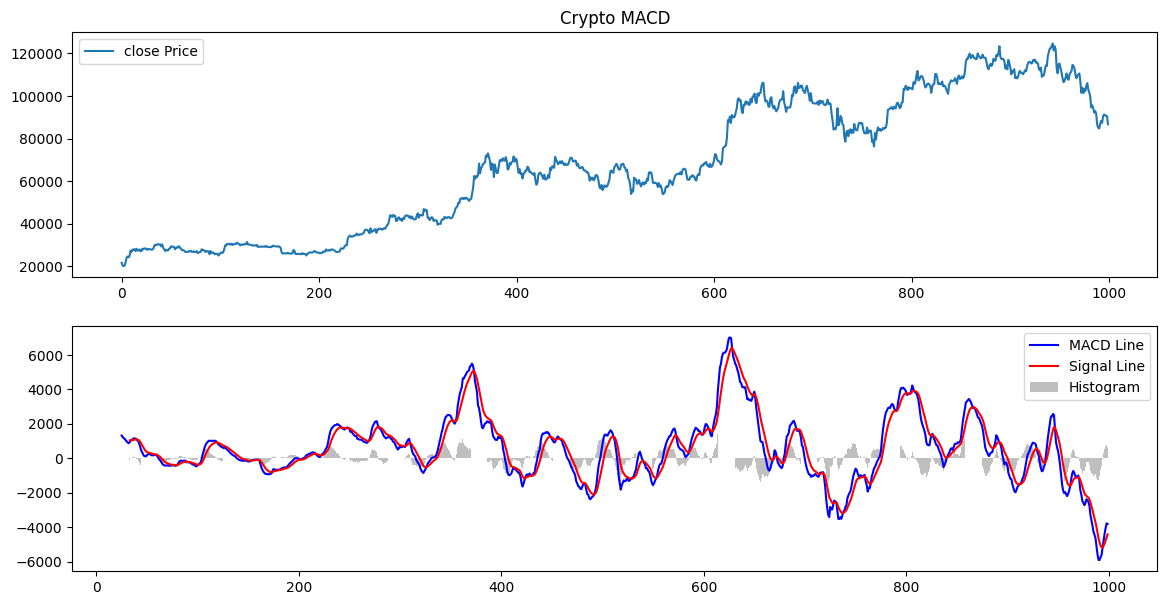

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

#Plotting Close Price
plt.subplot(2,1,1)
plt.plot(df["close"],label="close Price")
plt.title("Crypto MACD")
plt.legend()

#Plottinf MACD
plt.subplot(2,1,2)
plt.plot(df["macd"],label="MACD Line",color="blue")
plt.plot(df["macd signal"], label="Signal Line", color="red")
plt.bar(df.index, df["macd diff"],label="Histogram",color="grey",alpha=0.5)
plt.legend()

plt.show()

In [8]:
# Bollinger Bands - Bollinger Bands show price relative to volatility
# Price near upper band → possible overbought
# Price near lower band → possible oversold
# Bollinger Bands consist of a middle band, which is a simple moving average, and two outer bands that represent standard deviations from the moving average.

from ta.volatility import BollingerBands

# Create the indicator
bb = BollingerBands(close=df["close"], window=20, window_dev=2)

# Add Bollinger Bands to the dataframe
df["bb_high"] = bb.bollinger_hband()
df["bb_mid"] = bb.bollinger_mavg()
df["bb_low"] = bb.bollinger_lband()


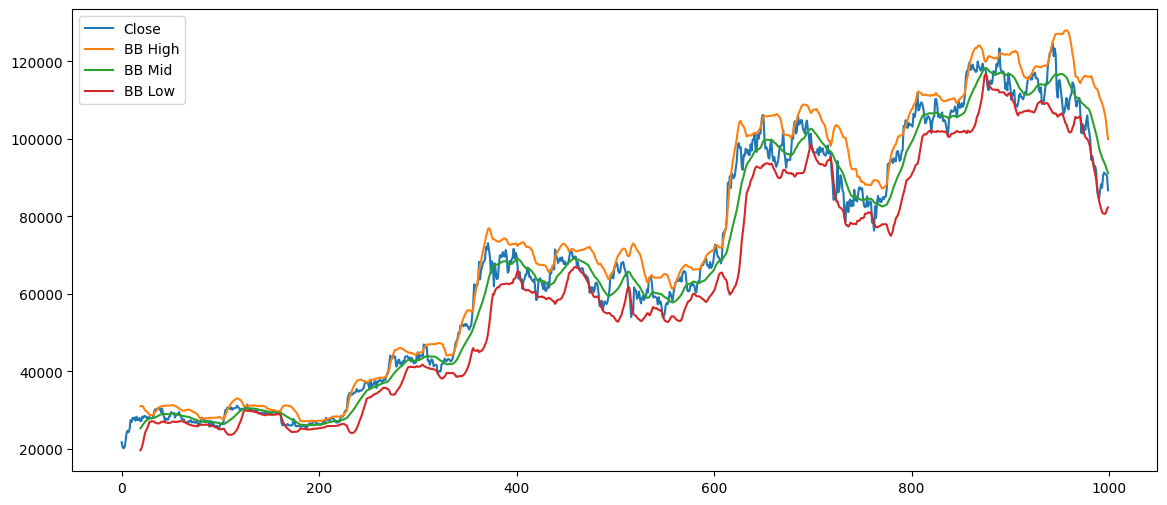

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["close"], label="Close")
plt.plot(df.index, df["bb_high"], label="BB High")
plt.plot(df.index, df["bb_mid"], label="BB Mid")
plt.plot(df.index, df["bb_low"], label="BB Low")
plt.legend()
plt.show()


In [10]:
# Stochastic Oscillator
# The Stochastic Oscillator compares a closing price to its price range over time. It has two lines: %K (fast) and %D (slow). These lines move between 0 and 100, showing momentum and trend strength.
# %K = 100 * (Current Close — Lowest Low) / (Highest High — Lowest Low)
# %D = 3-day SMA of %K
# The standard lookback period is 14 days, but you can adjust it.
# Values over 80, it means there may be overbuying


# Compute Stochastic Oscillator and add to df
stoch = ta.momentum.StochasticOscillator(
    high=df['high'],
    low=df['low'],
    close=df['close'],
    window=14,
    smooth_window=3
)

df['stoch_k'] = stoch.stoch()        # Smoothed %K
df['stoch_d'] = stoch.stoch_signal() # %D line



In [11]:
#df["stochastic_oscillator"] = ta.momentum.StochasticOscillator(
#    high=df["high"],
#    low=df["low"],
#    close=df["close"]
#).stoch()

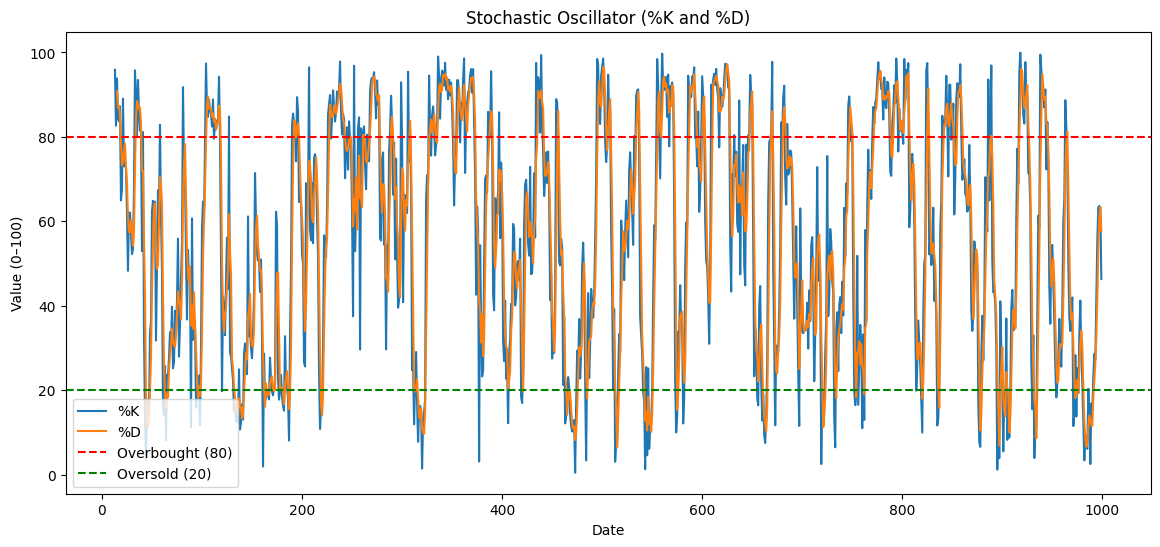

In [12]:


plt.figure(figsize=(14,6))
plt.plot(df.index, df['stoch_k'], label='%K')
plt.plot(df.index, df['stoch_d'], label='%D')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title("Stochastic Oscillator (%K and %D)")
plt.xlabel("Date")
plt.ylabel("Value (0–100)")
plt.legend()
plt.show()



In [13]:
#Keep num_trades and volume-related features-  Captures market activity trends.
# Example rolling stats
df['trades_7d_avg'] = df['num_trades'].rolling(7).mean()
df['trades_30d_avg'] = df['num_trades'].rolling(30).mean()
df['volume_7d_avg'] = df['volume'].rolling(7).mean()
df['volume_30d_avg'] = df['volume'].rolling(30).mean()


In [14]:
# Drop rows with NaN after rolling calculations - Rolling calculations (SMA, RSI, volatility) create NaNs at the beginning.
# Drop them before feeding into ML models.

df = df.dropna().reset_index(drop=True)


In [15]:
# features These are the columns I want the model to see
# X - the actual data from those columns, ready for ML
features = [
    "close_pct_1d", "close_pct_7d", "vol_7d", "vol_30d",
    "rsi", "sma_20", "sma_50", "sma_200",
    "bb_high", "bb_mid", "bb_low",
    "stoch_k", "stoch_d",
    "trades_7d_avg", "trades_30d_avg",
    "volume_7d_avg", "volume_30d_avg"
]
X = df[features]


In [16]:
# Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


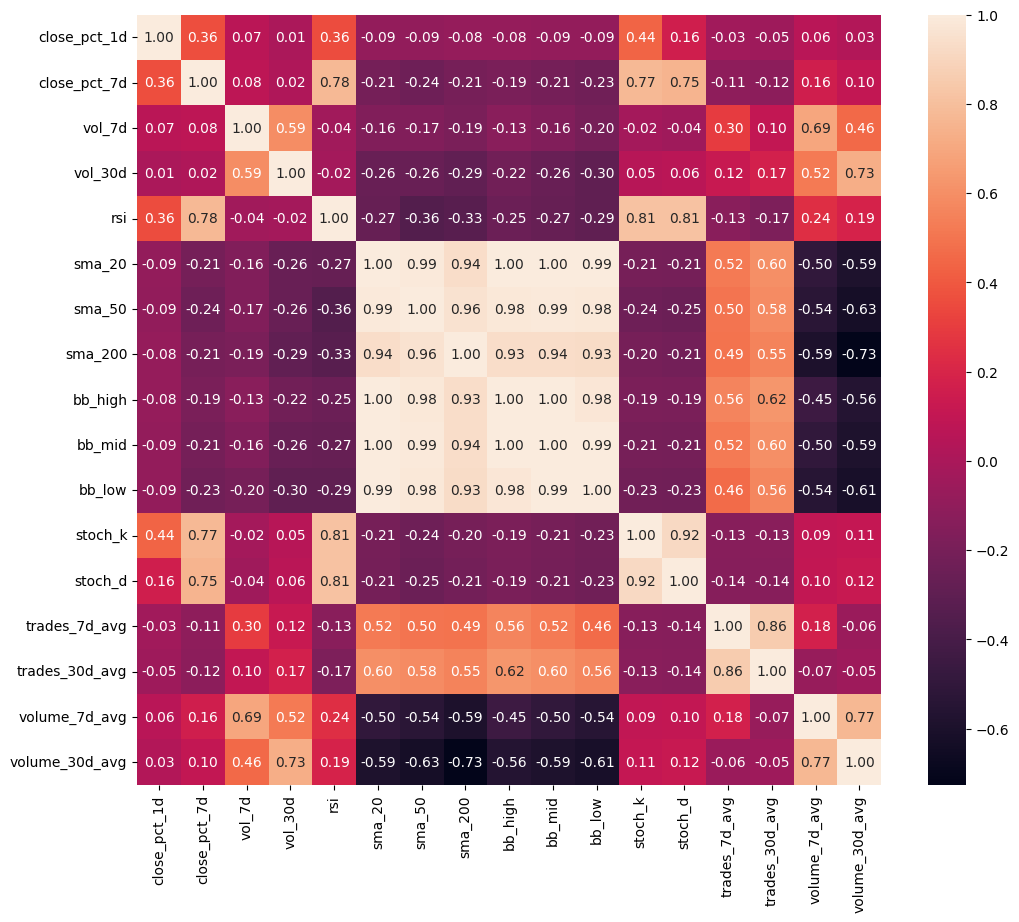

In [17]:
# Check Feature Correlation
# Helps avoid redundant features
# Can drop features that are highly correlated (>0.9)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df[features].corr(), annot=True, fmt=".2f")
plt.show()


## Select Good Features only*****

#### Step 4: Label Generation (Target Variable)

In [27]:
### Rule-Based Labeling (Multiclass)
### If next_day_return > +2% → BUY
### If next_day_return < –2% → SELL
### Else → HOLD  

In [28]:
"""
Generates Buy/Sell/Hold labels based on future returns.

    Parameters:
    - threshold_buy  : % return above which we BUY (default 2%)
    - threshold_sell : % return below which we SELL (default -2%)
    - future_period  : number of days ahead to calculate return (default 1)
    
    Labels:
    0 = SELL
    1 = HOLD
    2 = BUY

"""

df["future_return"] = df["close"].pct_change().shift(-1)
 
def label(row):
    if row["future_return"] > 0.02:
        return 2
    elif row["future_return"] < -0.02:
        return 0
    else:
        return 1
 
df["label"] = df.apply(label, axis=1)

In [29]:
df.head()


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,bb_mid,bb_low,stoch_k,stoch_d,trades_7d_avg,trades_30d_avg,volume_7d_avg,volume_30d_avg,future_return,label
0,2023-09-23,26580.14,26632.81,26509.00,26575.96,9440.70260,2023-09-23 23:59:59.999,2.508740e+08,421717,4387.19730,...,26277.1635,25276.535868,64.856325,64.808569,713303.714286,668560.966667,26930.290613,28719.630791,-0.012326,1
1,2023-09-24,26575.97,26738.54,26122.08,26248.38,15706.65771,2023-09-24 23:59:59.999,4.163683e+08,545045,7547.06342,...,26298.2815,25319.031080,52.172061,60.682189,723056.571429,666347.866667,27317.227033,28318.074791,0.002150,1
2,2023-09-25,26248.39,26446.15,25990.46,26304.81,26266.20390,2023-09-25 23:59:59.999,6.882526e+08,873488,12654.58207,...,26323.9170,25372.566775,49.884571,55.637652,713739.857143,684483.733333,24926.622939,28859.540813,-0.003161,1
3,2023-09-26,26304.80,26397.46,26088.34,26221.67,18495.35066,2023-09-26 23:59:59.999,4.852179e+08,697727,8813.76144,...,26347.0030,25429.716495,26.608119,42.888250,685118.571429,696104.966667,22398.741337,29072.731097,0.005771,1
4,2023-09-27,26221.68,26850.00,26112.06,26372.99,34771.57978,2023-09-27 23:59:59.999,9.187978e+08,939690,16813.75506,...,26352.9025,25436.541507,25.619680,34.037457,695461.714286,709992.733333,22479.364353,29475.362871,0.024586,2


In [30]:
# Save the processed excel
df.to_csv(r"D:\DATA SCIENCE\SCHOOL PROJECTS\MACHINE LEARNING\data\processed/crypto_labeled_features.csv", index=False)
